In [159]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'imageio'

In [142]:
coco = COCO('./images_thermal_train/coco.json')
img_dir = './images_thermal_train'
image_id = 0

img = coco.imgs[image_id]
# loading annotations into memory...
# Done (t=12.70s)
# creating index...
# index created!

img

loading annotations into memory...
Done (t=1.45s)
creating index...
index created!


{'extra_info': {'hours': 'day',
  'scene': 'highway',
  'video_id': 'GzdKTLbkG5F7gAunM',
  'weather': 'partly_cloudy'},
 'file_name': 'data/video-GzdKTLbkG5F7gAunM-frame-000108-QHZmA4QTZCnzBG3HZ.jpg',
 'height': 512,
 'id': 0,
 'subdirs': 'data',
 'width': 640}

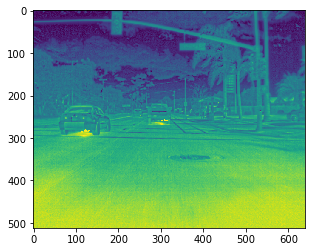

In [143]:
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()

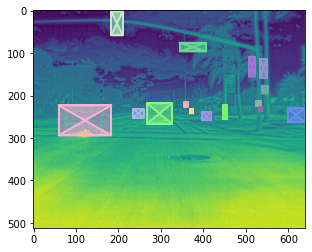

In [144]:
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns, draw_bbox=True)

In [145]:
anns

[{'area': 748,
  'bbox': [533, 114, 17, 44],
  'category_id': 10,
  'extra_info': {'color': 'green',
   'human_annotated': 'human',
   'occluded': 'no_(fully_visible)'},
  'id': 1,
  'image_id': 0,
  'iscrowd': False,
  'segmentation': [[533, 114, 550, 114, 533, 158, 550, 158]]},
 {'area': 675,
  'bbox': [507, 110, 15, 45],
  'category_id': 10,
  'extra_info': {'color': 'red',
   'human_annotated': 'human',
   'occluded': 'no_(fully_visible)'},
  'id': 2,
  'image_id': 0,
  'iscrowd': False,
  'segmentation': [[507, 110, 522, 110, 507, 155, 522, 155]]},
 {'area': 1512,
  'bbox': [183, 2, 27, 56],
  'category_id': 10,
  'extra_info': {'color': 'green',
   'human_annotated': 'human',
   'occluded': 'no_(fully_visible)'},
  'id': 3,
  'image_id': 0,
  'iscrowd': False,
  'segmentation': [[183, 2, 210, 2, 183, 58, 210, 58]]},
 {'area': 255,
  'bbox': [537, 178, 15, 17],
  'category_id': 10,
  'extra_info': {'human_annotated': 'human', 'occluded': 'no_(fully_visible)'},
  'id': 4,
  'image_

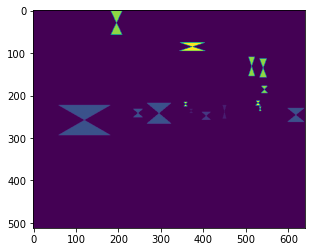

In [157]:
mask = np.zeros((512, 640))

mask = np.maximum(mask,coco.annToMask(anns[0])*anns[0]['category_id'])
for i in range(len(anns)):
    #mask += coco.annToMask(anns[i])
    mask = np.maximum(mask,coco.annToMask(anns[i])*anns[i]['category_id'])

plt.imshow(mask)

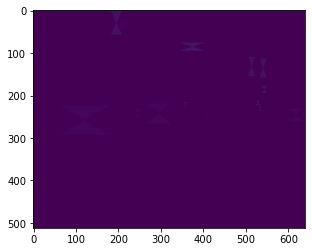

In [158]:
np.put(mask, np.where(mask == 0), 255)
plt.imshow(mask)

In [155]:
print("person: " + str(np.count_nonzero(mask == 1)))
print("bike: " + str(np.count_nonzero(mask == 2)))
print("car: " + str(np.count_nonzero(mask == 3)))
print("motor: " + str(np.count_nonzero(mask == 4)))
print("bus: " + str(np.count_nonzero(mask == 6)))
print("train: " + str(np.count_nonzero(mask == 7)))
print("truck: " + str(np.count_nonzero(mask == 8)))
print("light: " + str(np.count_nonzero(mask == 10)))
print("hydrant: " + str(np.count_nonzero(mask == 11)))
print("sign: " + str(np.count_nonzero(mask == 12)))
print("dog: " + str(np.count_nonzero(mask == 17)))
print("skateboard: " + str(np.count_nonzero(mask == 37)))
print("stroller: " + str(np.count_nonzero(mask == 73)))
print("scooter: " + str(np.count_nonzero(mask == 77)))
print("other: " + str(np.count_nonzero(mask == 79)))


person: 186
bike: 217
car: 6766
motor: 0
bus: 0
train: 0
truck: 0
light: 1600
hydrant: 0
sign: 747
dog: 0
skateboard: 0
stroller: 0
scooter: 0
other: 0


In [117]:
mask.shape



(512, 640)

In [167]:
mask = np.array(Image.imread('C:/Users/darjan.crncic/Documents/flir_dataset/thermal_mask/data/video-GzdKTLbkG5F7gAunM-frame-000108-QHZmA4QTZCnzBG3HZ.jpg'))
plt.imshow(mask)


AttributeError: module 'PIL.Image' has no attribute 'imread'

In [165]:
print("person: " + str(np.count_nonzero(mask == 1)))
print("bike: " + str(np.count_nonzero(mask == 2)))
print("car: " + str(np.count_nonzero(mask == 3)))
print("motor: " + str(np.count_nonzero(mask == 4)))
print("bus: " + str(np.count_nonzero(mask == 6)))
print("train: " + str(np.count_nonzero(mask == 7)))
print("truck: " + str(np.count_nonzero(mask == 8)))
print("light: " + str(np.count_nonzero(mask == 10)))
print("hydrant: " + str(np.count_nonzero(mask == 11)))
print("sign: " + str(np.count_nonzero(mask == 12)))
print("dog: " + str(np.count_nonzero(mask == 17)))
print("skateboard: " + str(np.count_nonzero(mask == 37)))
print("stroller: " + str(np.count_nonzero(mask == 73)))
print("scooter: " + str(np.count_nonzero(mask == 77)))
print("other: " + str(np.count_nonzero(mask == 79)))


person: 2099
bike: 1630
car: 5212
motor: 564
bus: 113
train: 125
truck: 215
light: 505
hydrant: 418
sign: 393
dog: 3
skateboard: 0
stroller: 0
scooter: 0
other: 0
